In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import datetime

import warnings

import uszipcode as zc

# TS decomposition
import statsmodels.api as sm


warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [12]:
df = pd.read_csv('./SFRMFR_combined.csv', parse_dates=['Month_Year'])

df.drop(columns = ['Unnamed: 0', 'city', ], inplace=True)

df.head(200)


Month_Year  census_cbsa_geoid  census_zcta5_geoid  sfr_rental_index  \
0   2010-01-01              12060               30309        100.000000   
1   2010-02-01              12060               30309        101.601291   
2   2010-03-01              12060               30309         99.448626   
3   2010-04-01              12060               30309        100.546999   
4   2010-05-01              12060               30309        102.961591   
5   2010-06-01              12060               30309        101.057081   
6   2010-07-01              12060               30309        101.196260   
7   2010-08-01              12060               30309        101.151763   
8   2010-09-01              12060               30309        101.636364   
9   2010-10-01              12060               30309        101.793769   
10  2010-11-01              12060               30309        101.733506   
11  2010-12-01              12060               30309        101.744035   
12  2011-01-01              12060               30309        102.138585   
13  2011-02-01              12060               30309        102.415582   
14  2011-03-01              12060               30309        102.733284   
15  2011-04-01              12060               30309        103.246621   
16  2011-05-01              12060               30309        103.479726   
17  2011-06-01              12060               30309        104.191436   
18  2011-07-01              12060               30309        104.423140   
19  2011-08-01              12060               30309        104.721252   
20  2011-09-01              12060               30309        104.623507   
21  2011-10-01              12060               30309        104.595468   
22  2011-11-01              12060               30309        104.534106   
23  2011-12-01              12060               30309        104.290430   
24  2012-01-01              12060               30309        104.568792   
25  2012-02-01              12060               30309        104.974126   
26  2012-03-01              12060               30309        105.529159   
27  2012-04-01              12060               30309        106.146080   
28  2012-05-01              12060               30309        106.828617   
29  2012-06-01              12060               30309        107.328640   
30  2012-07-01              12060               30309        107.758389   
31  2012-08-01              12060               30309        107.787760   
32  2012-09-01              12060               30309        107.998125   
33  2012-10-01              12060               30309        107.878839   
34  2012-11-01              12060               30309        107.861521   
35  2012-12-01              12060               30309        108.020291   
36  2013-01-01              12060               30309        108.108074   
37  2013-02-01              12060               30309        108.379115   
38  2013-03-01              12060               30309        108.838960   
39  2013-04-01              12060               30309        109.401490   
40  2013-05-01              12060               30309        109.930229   
41  2013-06-01              12060               30309        110.498150   
42  2013-07-01              12060               30309        111.018237   
43  2013-08-01              12060               30309        111.417762   
44  2013-09-01              12060               30309        111.539804   
45  2013-10-01              12060               30309        111.737572   
46  2013-11-01              12060               30309        111.892730   
47  2013-12-01              12060               30309        111.902940   
48  2014-01-01              12060               30309        112.014701   
49  2014-02-01              12060               30309        112.355291   
50  2014-03-01              12060               30309        112.808841   
51  2014-04-01              12060               30309        113.375254   
52  2014-05-01              1

In [13]:
# Define your set of ZIP codes
zc_set = set(df['census_zcta5_geoid'])

# Look up using zc
# Create a search engine instance
search = zc.SearchEngine()


# Create a empty list to store zipcode lookup
data = []

# Loop through the ZIP codes and lookup their corresponding city
for zipcode in zc_set:
    result = search.by_zipcode(zipcode)
    if result:
        state = result.state
        county = result.county
        city = result.city
        data.append({'zipcode': zipcode, 'State': state, 'City': city, 'County': county})

zc_lookup = pd.DataFrame(data)


In [14]:
df = pd.merge(df, zc_lookup, how = 'left', left_on = 'census_zcta5_geoid', right_on='zipcode')

In [17]:
df.head(200)
df['State'].unique()

array(['GA', 'OH'], dtype=object)

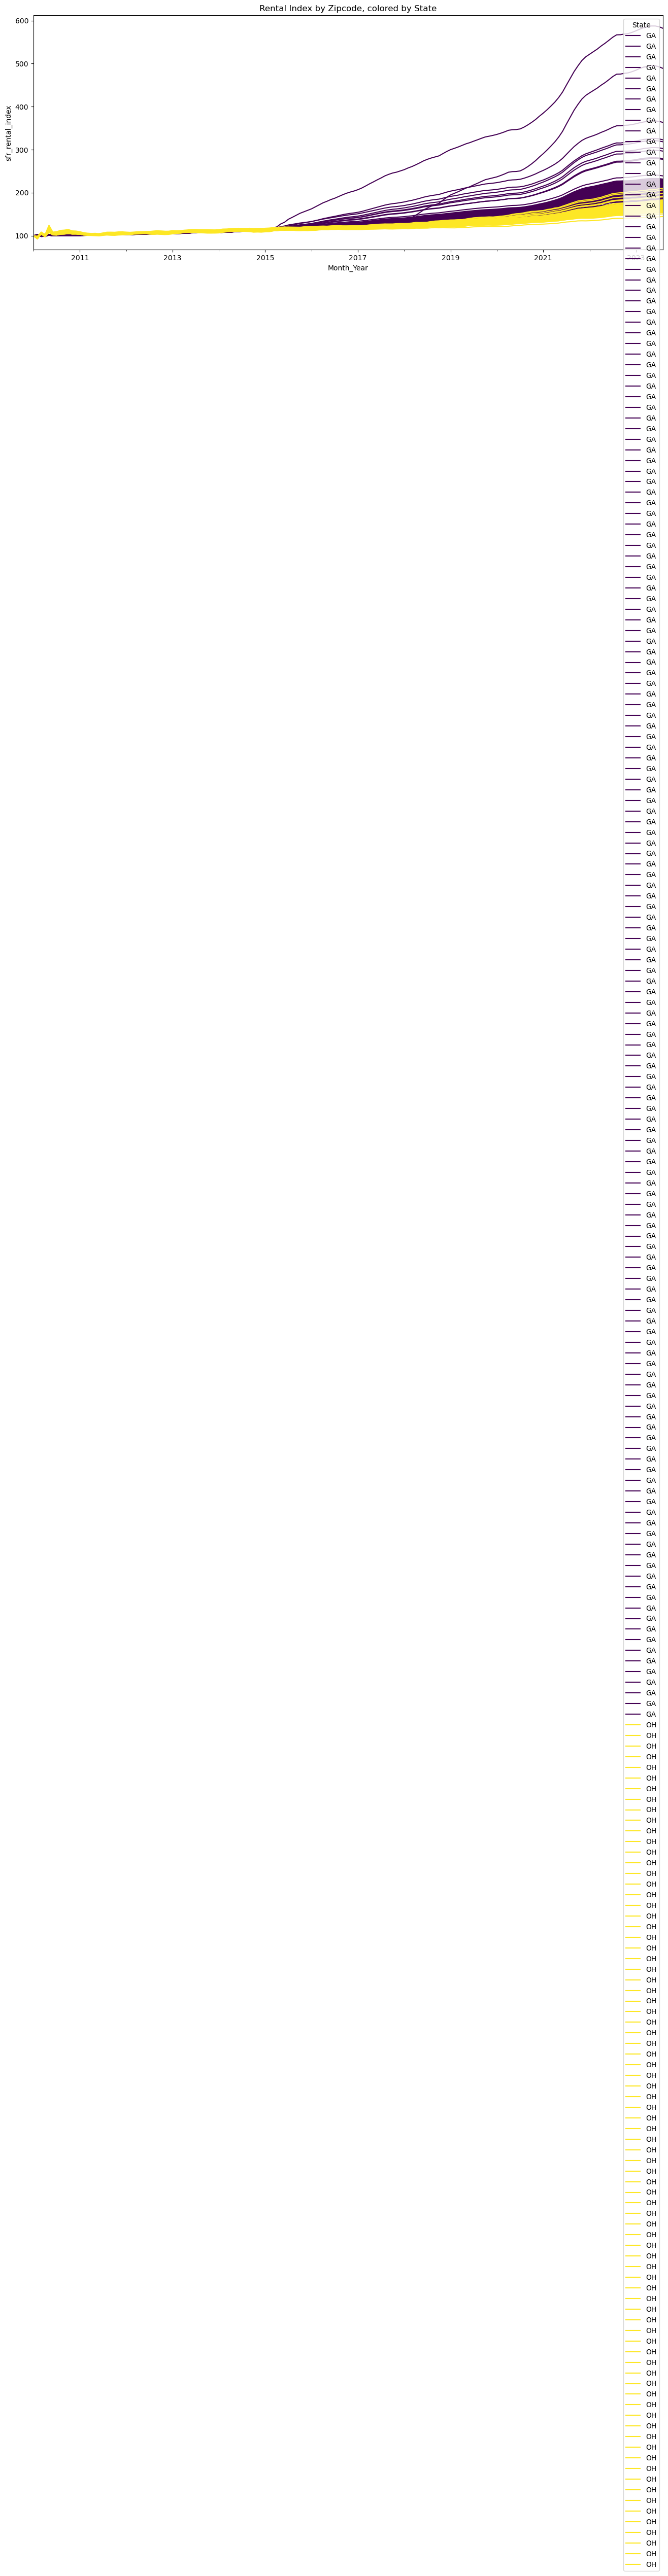

In [27]:
# Group by both 'zipcode' and 'City' and create a plot for each group
grouped = df.groupby(['census_zcta5_geoid','State', 'County'])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(16, 6))

# Create a colormap with many distinct colors
cmap = plt.get_cmap('viridis', len(df['State'].unique()))

# Create a dictionary to map 'State' to a unique color
state_to_color = {state: cmap(i) for i, state in enumerate(df['State'].unique())}

# Iterate through each group and plot the data, coloring by 'State'
for (zipcode, state, county), group in grouped:
    color = state_to_color[state]  # Get a color from the dictionary based on 'State'
    group.plot(x='Month_Year', y='sfr_rental_index', ax=ax, label=state, color=color)

# Add a legend
ax.legend(title='State')

# Add labels, titles, etc., if needed
ax.set_xlabel('Month_Year')
ax.set_ylabel('sfr_rental_index')
ax.set_title('Rental Index by Zipcode, colored by State')

# Show the plot
plt.show()

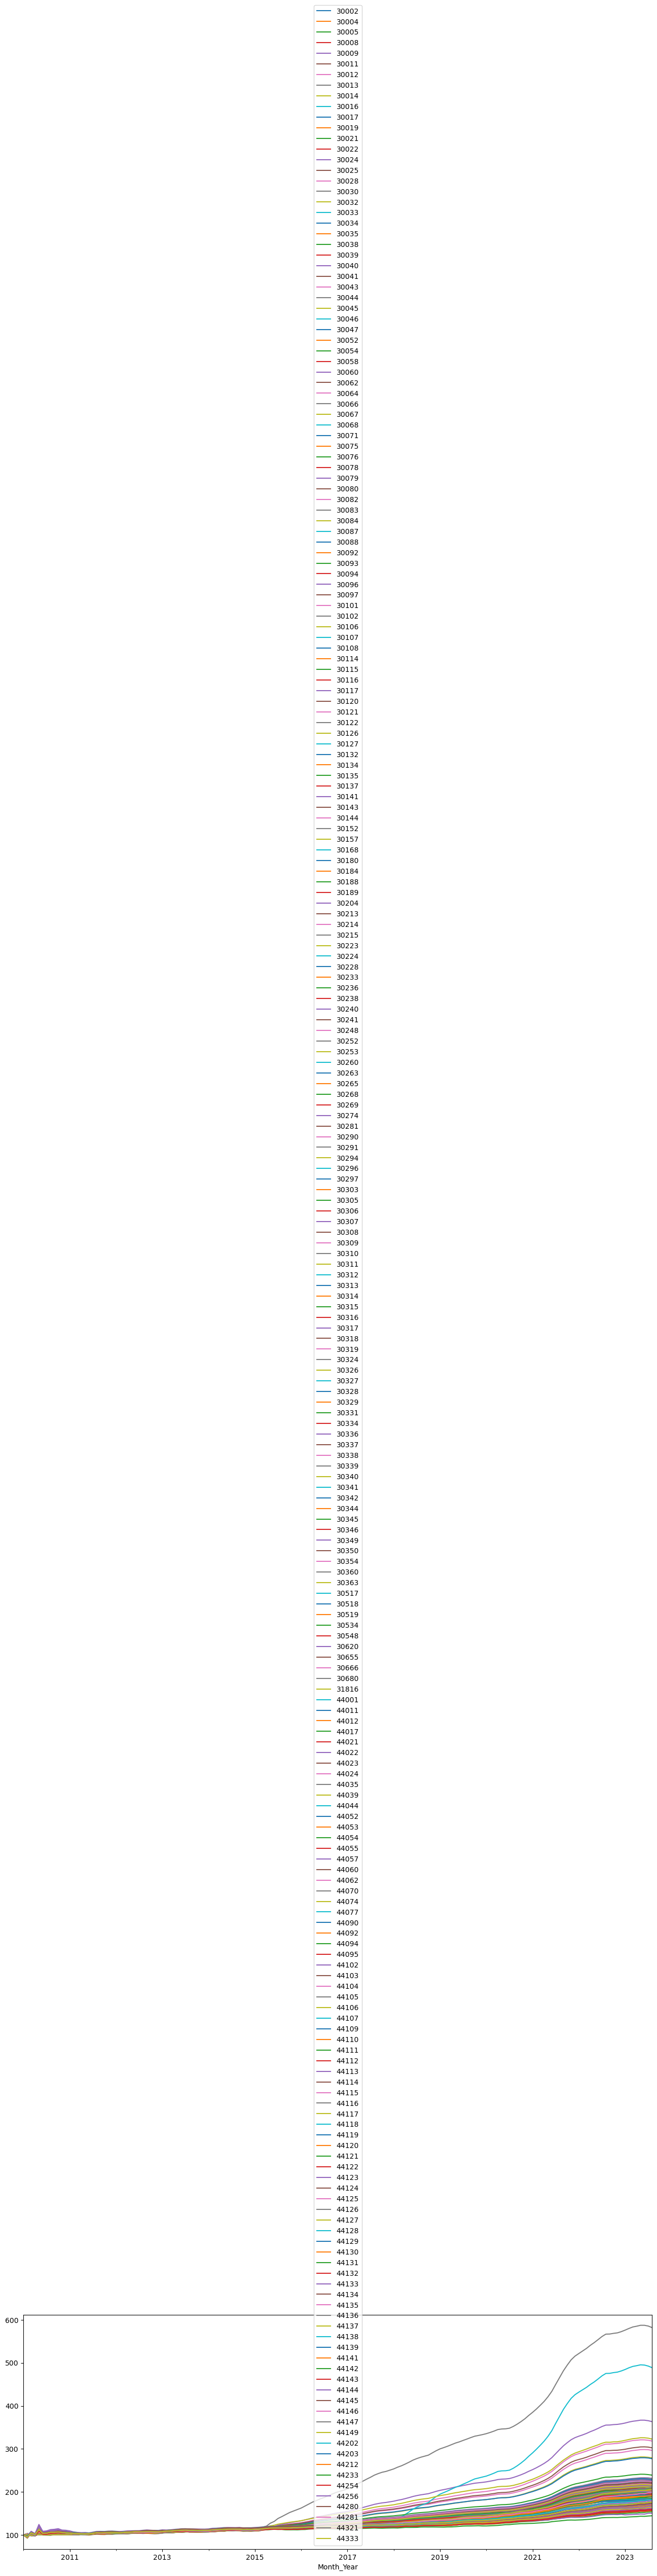

In [24]:
# Group by 'census_zcta5_geoid' and create a plot for each group
df_time_index = df.set_index('Month_Year')
grouped = df_time_index.groupby('census_zcta5_geoid')['sfr_rental_index']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(16, 6))

# Plot the data for each group, specify a label for the legend
for name, group in grouped:
    group.plot(ax=ax, label=name)

# Add a legend
ax.legend()

# Add labels, titles, etc., if needed

# Show the plot
plt.show()




# TIME SERIES DECOMPOSITION

### Seasonality

In [68]:
df.set_index('Month_Year', inplace=True)

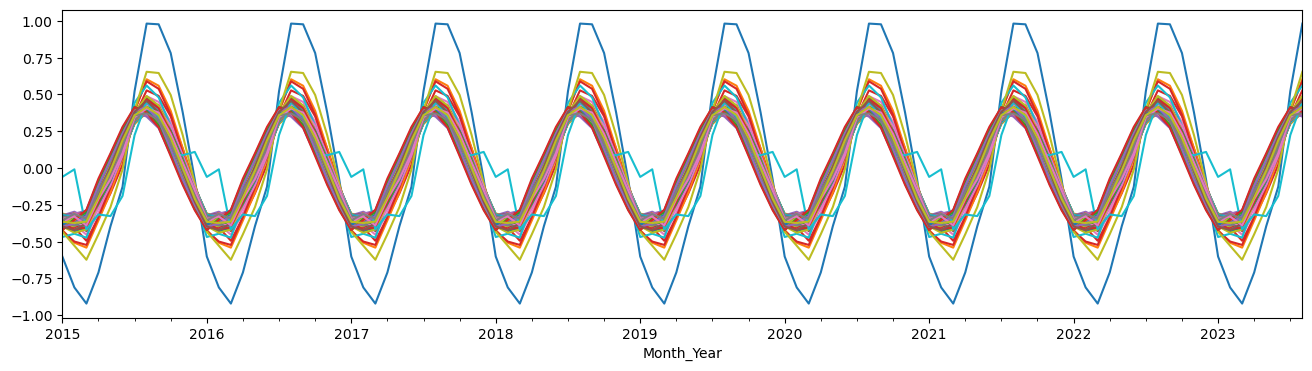

In [36]:
# Atlanta
ata = df[df['State'] == "GA"]
#df.set_index('Month_Year', inplace=True) 
rcParams["figure.figsize"] = 16, 4
unique_zipcodes = ata['zipcode'].unique()

# Create a dictionary to store decomposition results for each zipcode
decomposition_results = {}

for zipcode in unique_zipcodes:
    # Filter the DataFrame for the current zipcode
    zipcode_df = ata[ata['zipcode'] == zipcode]
    
    # Perform time series decomposition
    decomposition = sm.tsa.seasonal_decompose(zipcode_df['sfr_rental_index'], model='additive')
    
    # Store the decomposition results in the dictionary
    decomposition_results[zipcode] = decomposition
    
    # Plot it
    decomposition.seasonal['2015':"2023"].plot();

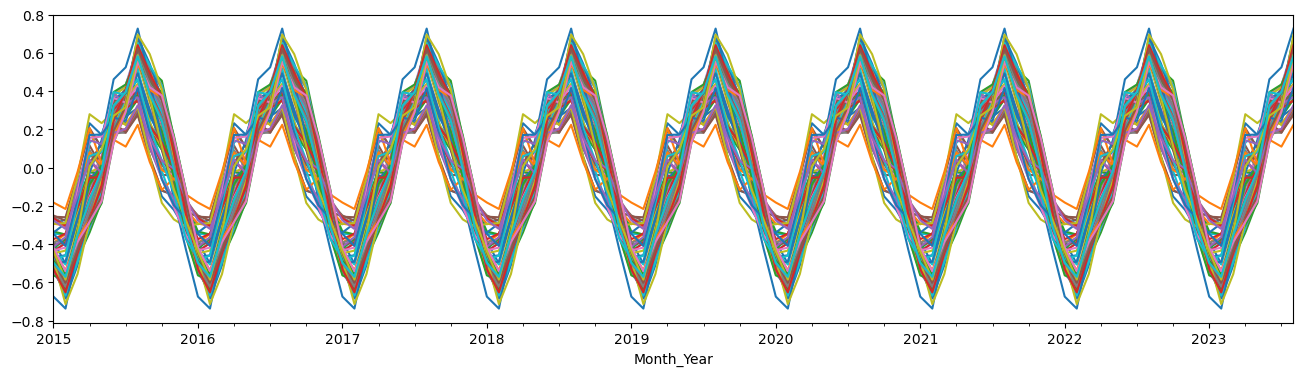

In [41]:
# Cleveland
# Atlanta
clv = df[df['State'] == "OH"]
#df.set_index('Month_Year', inplace=True) 
rcParams["figure.figsize"] = 16, 4
unique_zipcodes = clv['zipcode'].unique()

# Create a dictionary to store decomposition results for each zipcode
decomposition_results = {}

for zipcode in unique_zipcodes:
    # Filter the DataFrame for the current zipcode
    zipcode_df = clv[clv['zipcode'] == zipcode]
    
    # Perform time series decomposition
    decomposition = sm.tsa.seasonal_decompose(zipcode_df['sfr_rental_index'], model='additive')
    
    # Store the decomposition results in the dictionary
    decomposition_results[zipcode] = decomposition
    
    # Plot it
    decomposition.seasonal['2015':"2023"].plot();


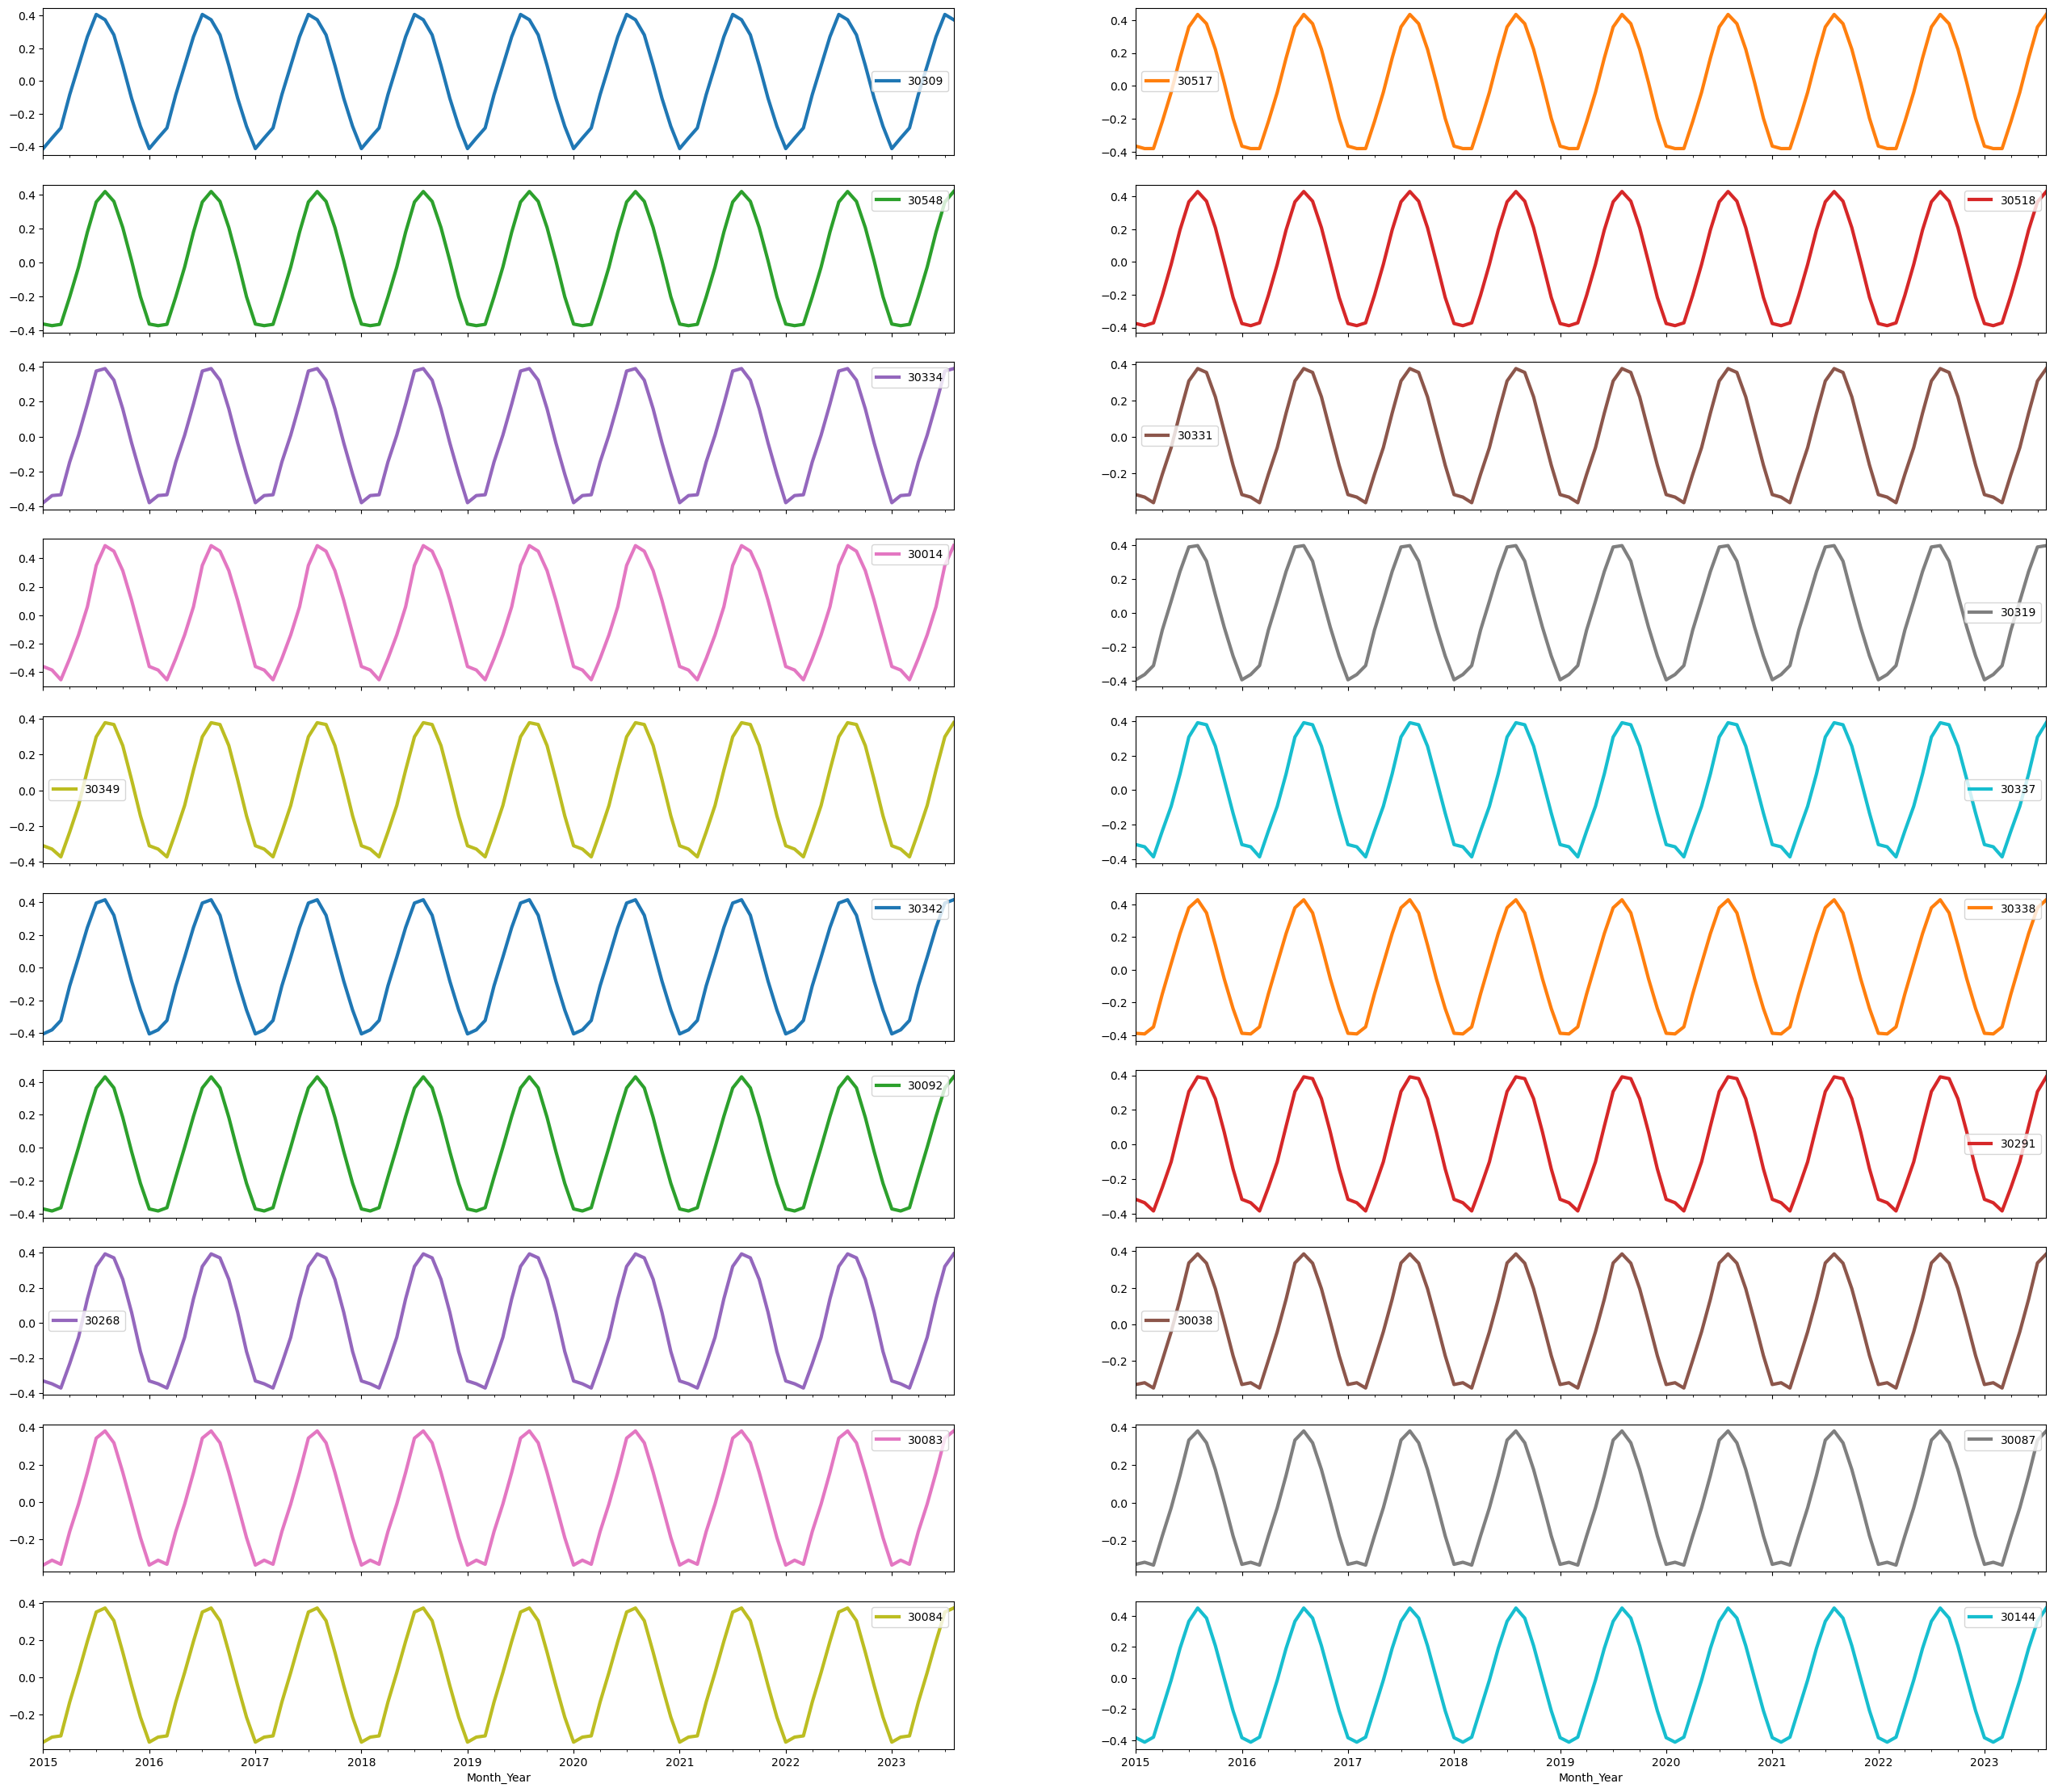

In [31]:
# CLEVELAND
# Init empty dict to store decompose results
unique_zipcodes = clv['zipcode'].unique()


seasonality_dict = {}
unique_zc_subset = unique_zipcodes[0:20]
for ts in unique_zc_subset:
    tmp = df[df['zipcode']==ts]
    decompositions = sm.tsa.seasonal_decompose(tmp['sfr_rental_index'])
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 32, 28
pd.DataFrame(seasonality_dict)["2015":"2023"].plot(
    subplots=True, layout=(10, 2), linewidth=3
);

### Trend

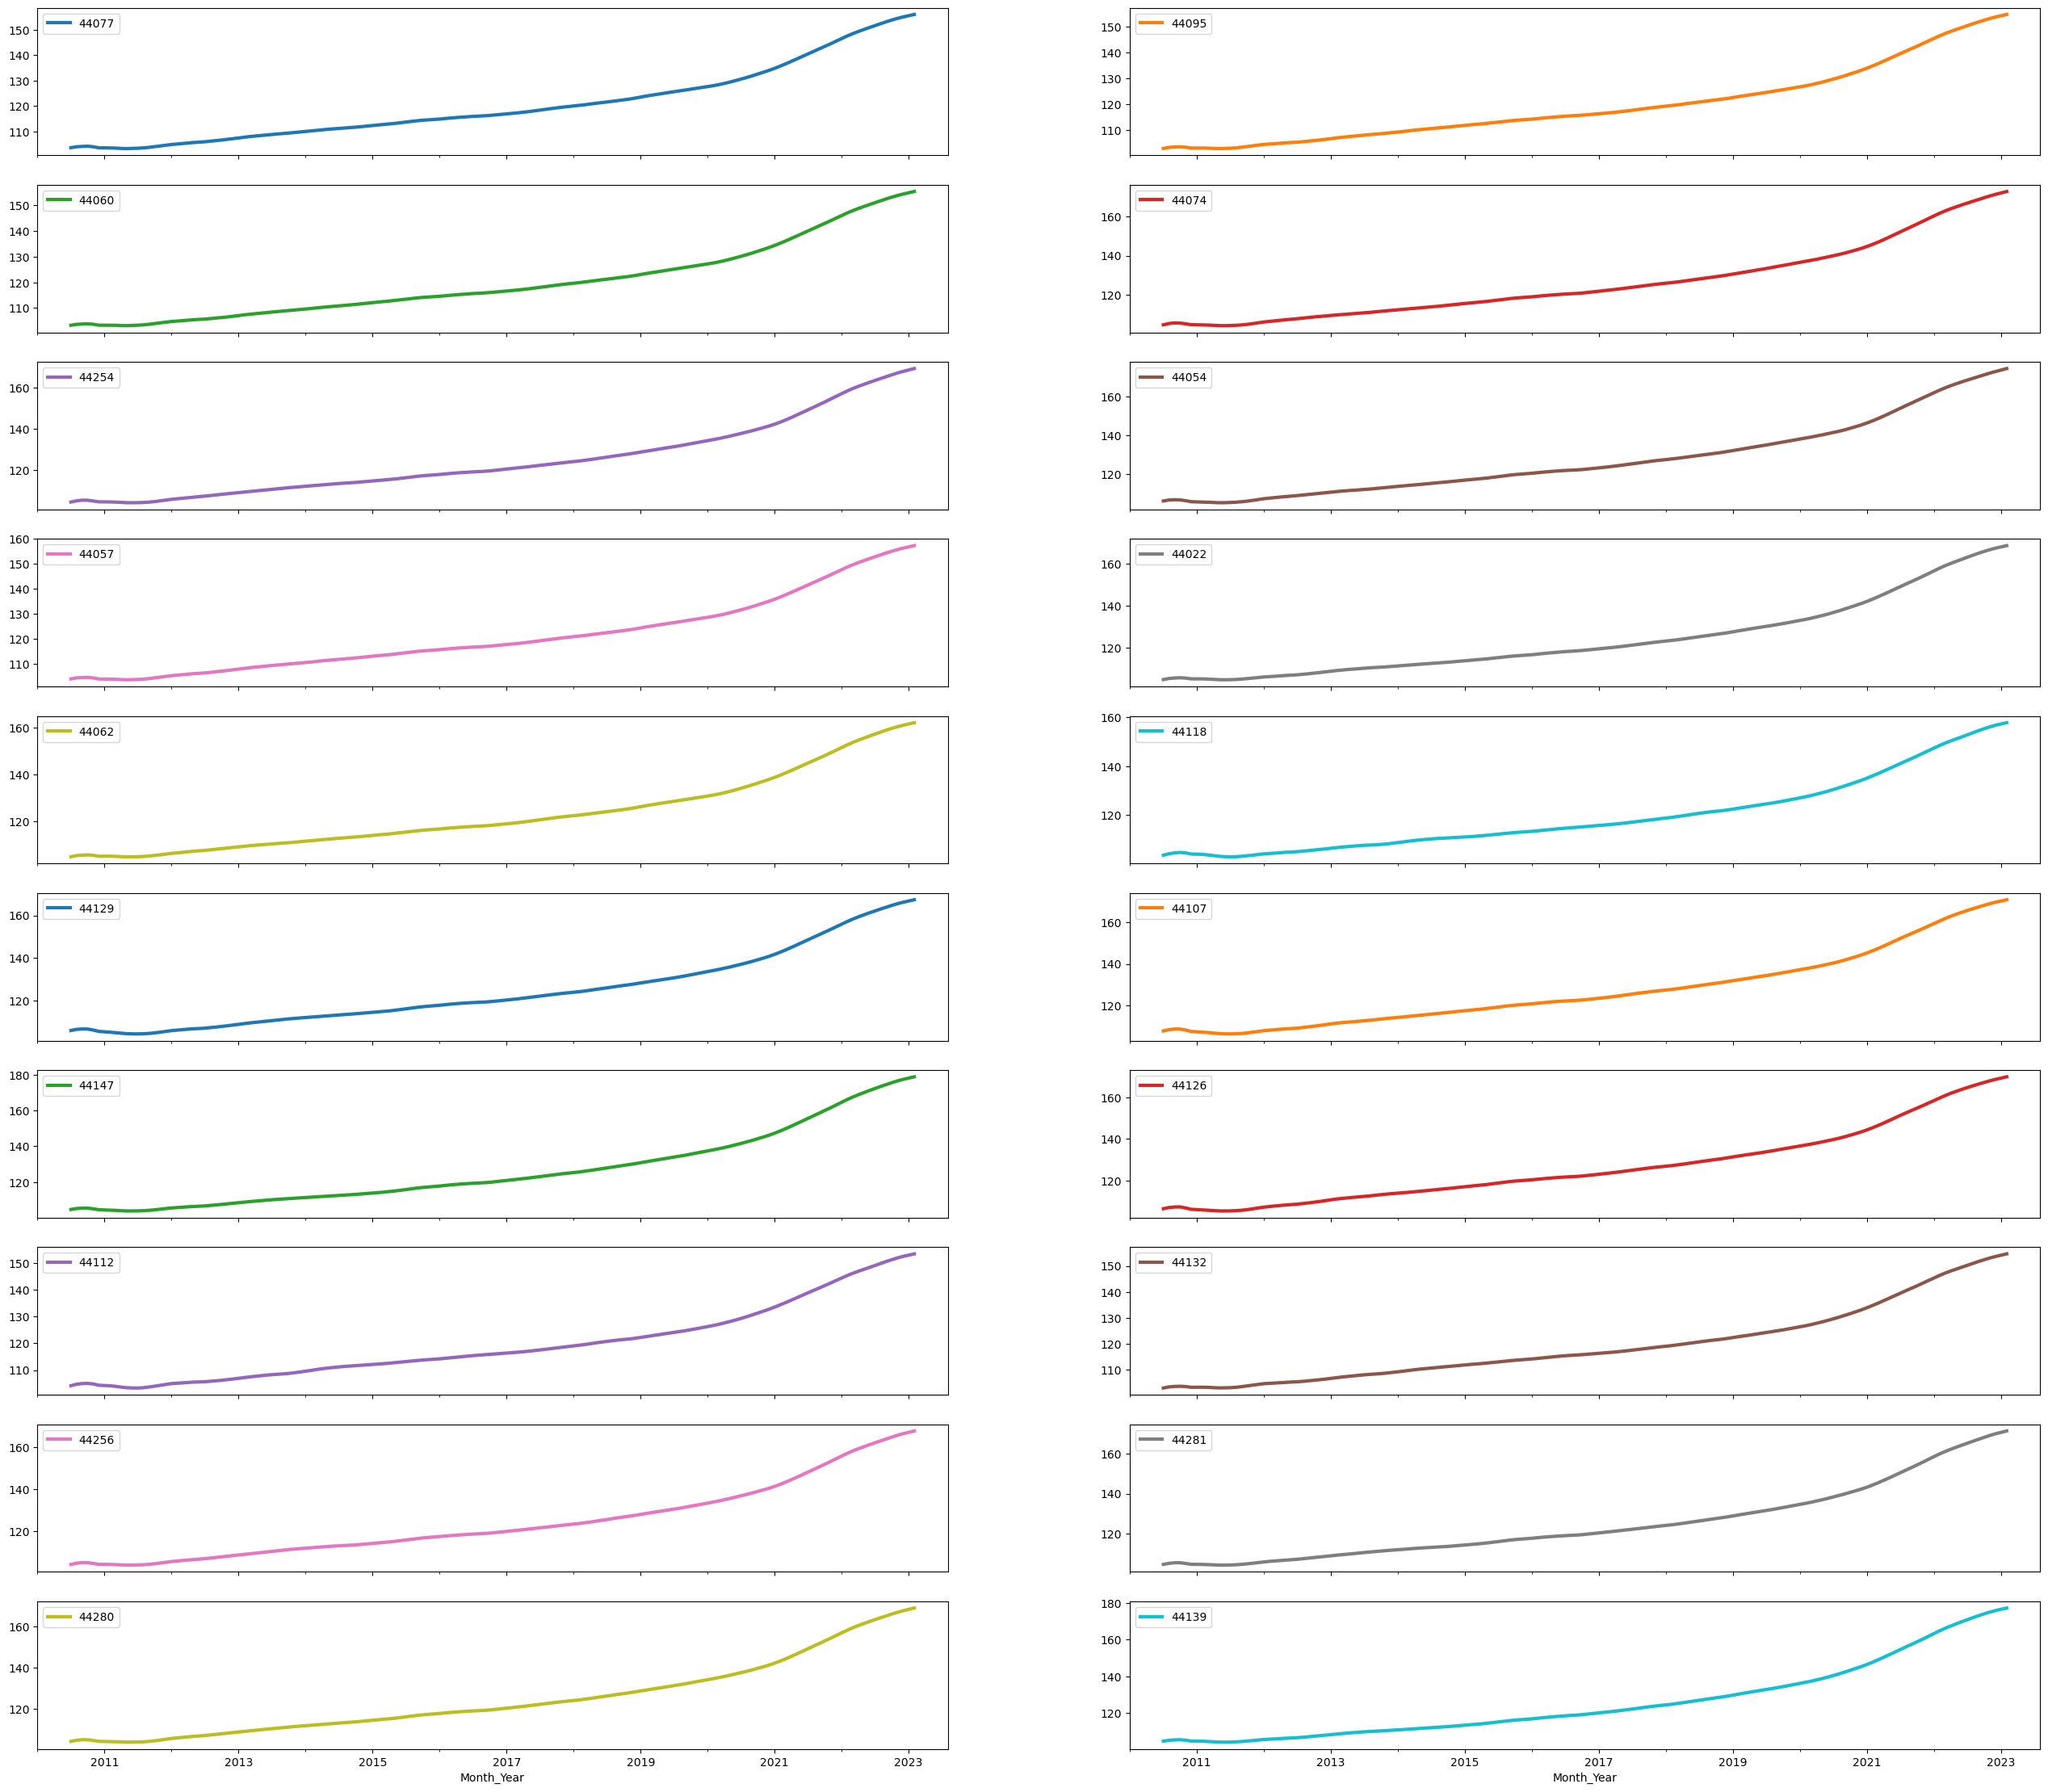

In [100]:
# Cleveland
trend_dict = {}
clv_zc = df[df['State'] == 'OH']['zipcode'].unique()
for ts in clv_zc[21:41]:
    tmp = df[df['zipcode']==ts]
    decompositions = sm.tsa.seasonal_decompose(tmp['sfr_rental_index'])
    # Store the results back
    trend_dict[ts] = decompositions.trend

rcParams["figure.figsize"] = 32, 28

pd.DataFrame(trend_dict).plot(subplots=True, layout=(10, 2), linewidth=3);

In [ ]:
# Atlanta Trends

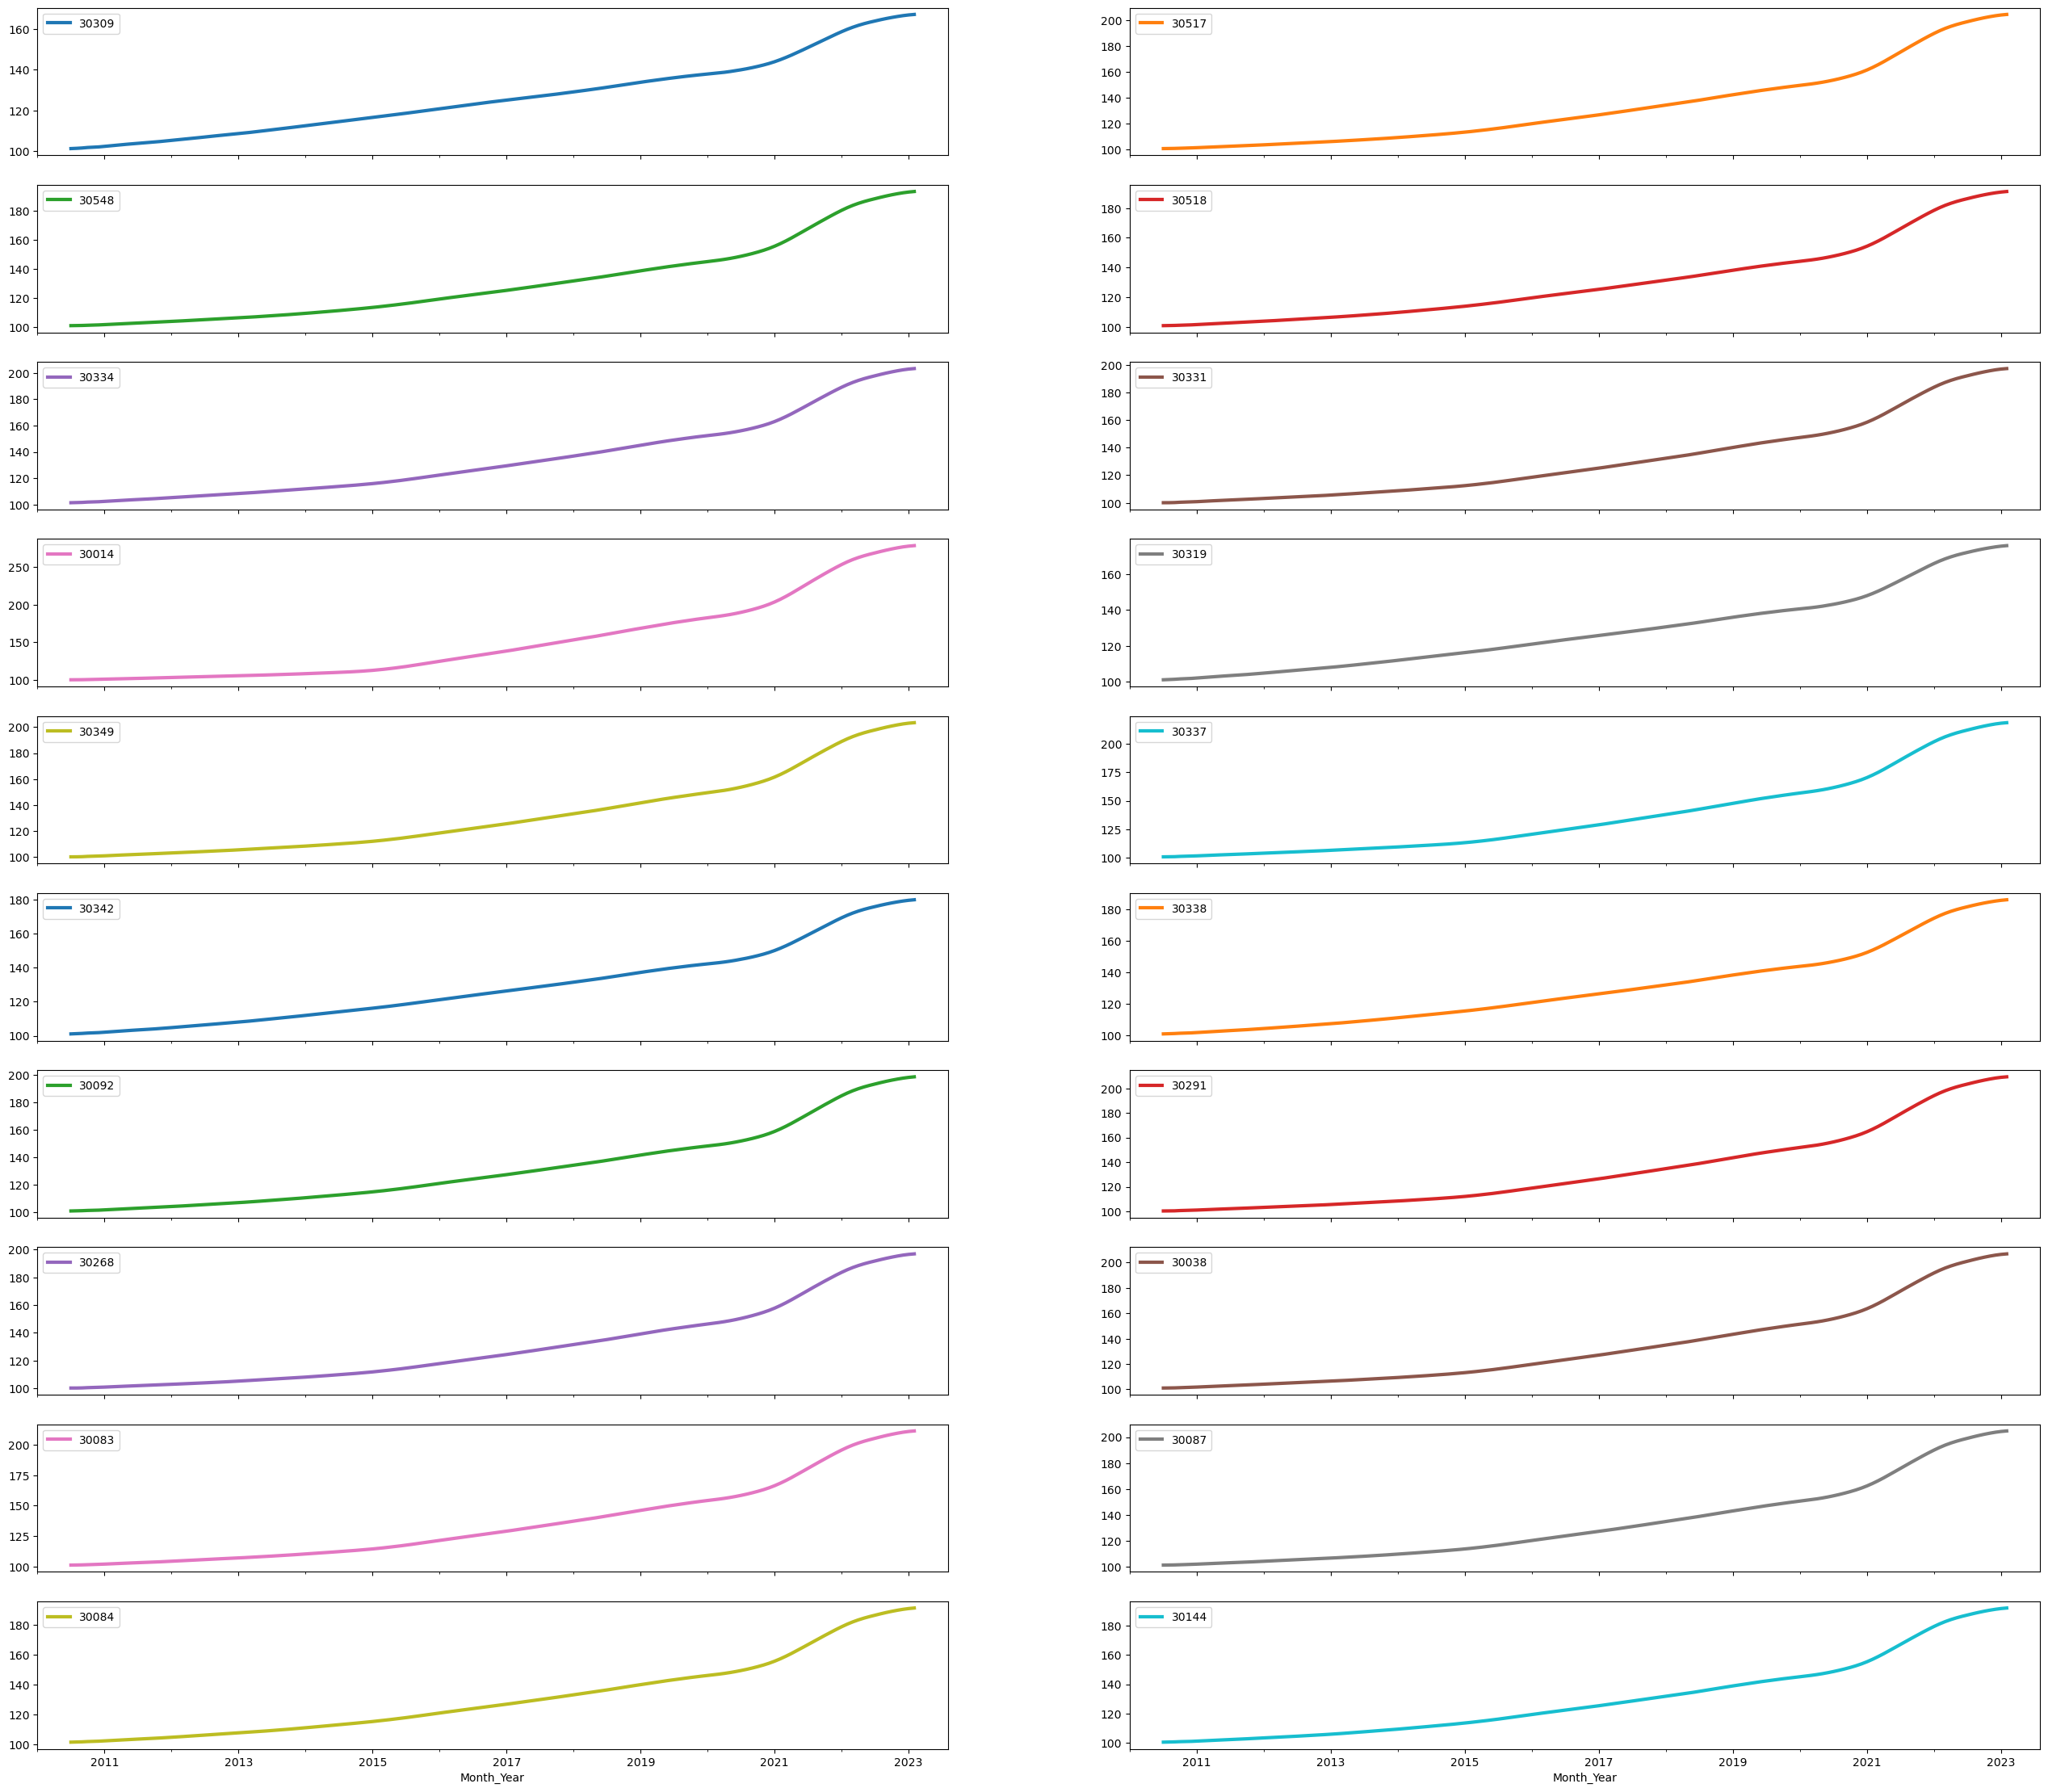

In [47]:
trend_dict = {}
atl_zc = df[df['State'] == 'GA']['zipcode'].unique()
for ts in atl_zc[0:20]:
    tmp = df[df['zipcode']==ts]
    decompositions = sm.tsa.seasonal_decompose(tmp['sfr_rental_index'])
    # Store the results back
    trend_dict[ts] = decompositions.trend

rcParams["figure.figsize"] = 32, 28

pd.DataFrame(trend_dict).plot(subplots=True, layout=(10, 2), linewidth=3);

In [48]:
df.columns

Index(['census_cbsa_geoid', 'census_zcta5_geoid', 'sfr_rental_index',
       'sfr_price_index', 'coef', 'Market', 'mfr_med_rent', 'mfr_mean_rent',
       'mfr_std_rent', 'mfr_med_occ', 'mfr_mean_occ', 'mfr_std_occ',
       'mfr_mean_rent_index', 'mfr_med_rent_index', 'mfr_mean_occ_index',
       'mfr_med_occ_index', 'zipcode', 'State', 'City', 'County'],
      dtype='object')

In [95]:
# Set the 'Date' column as the index
#df.reset_index(inplace=True)
df_zip = df[df['zipcode'] == unique_zipcodes[0]]
df_zip = df_zip[['sfr_rental_index',
       'sfr_price_index', 'coef','mfr_mean_rent_index', 'mfr_med_rent_index', 'mfr_mean_occ_index',
       'mfr_med_occ_index']]



In [96]:
[df_zip[ts].dtype for ts in df_zip.columns]

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')]

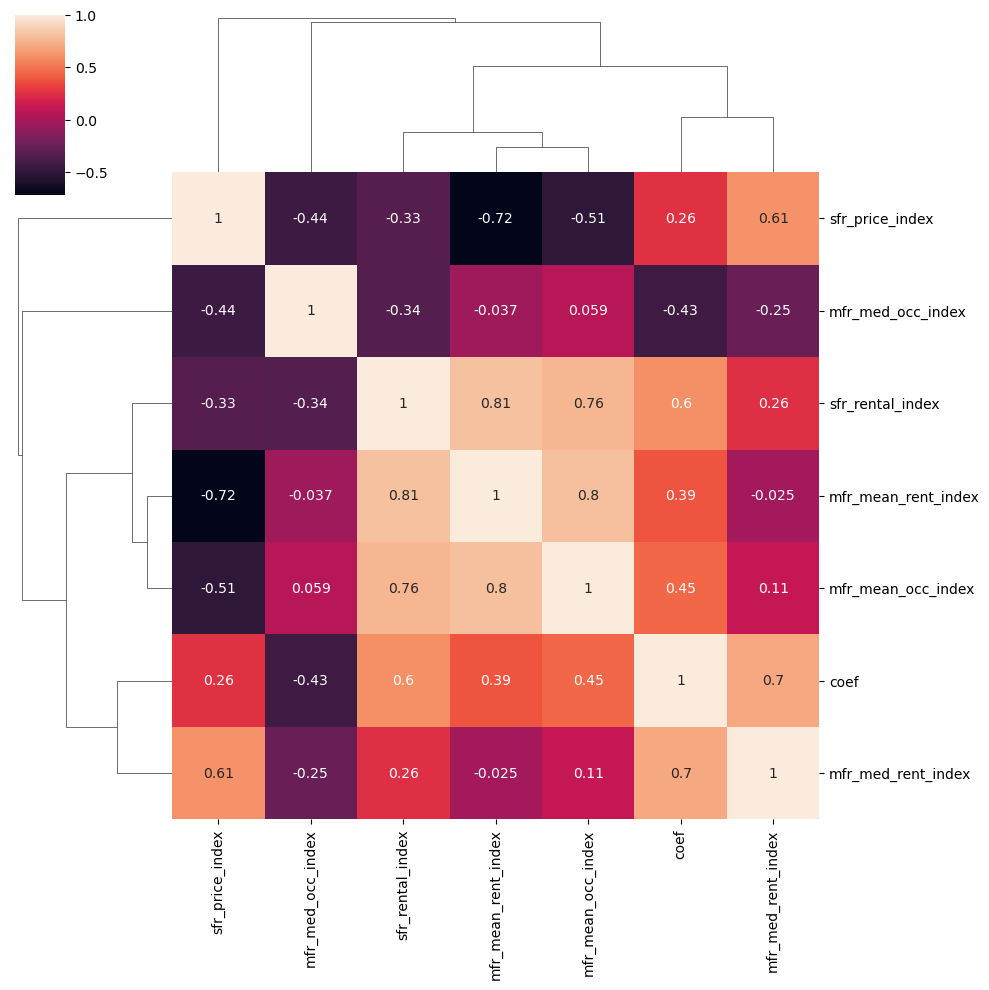

In [97]:
seasonality_dict = {
    ts: sm.tsa.seasonal_decompose(df_zip[ts].dropna()).seasonal for ts in df_zip.columns
}

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, square=True)
plt.show();

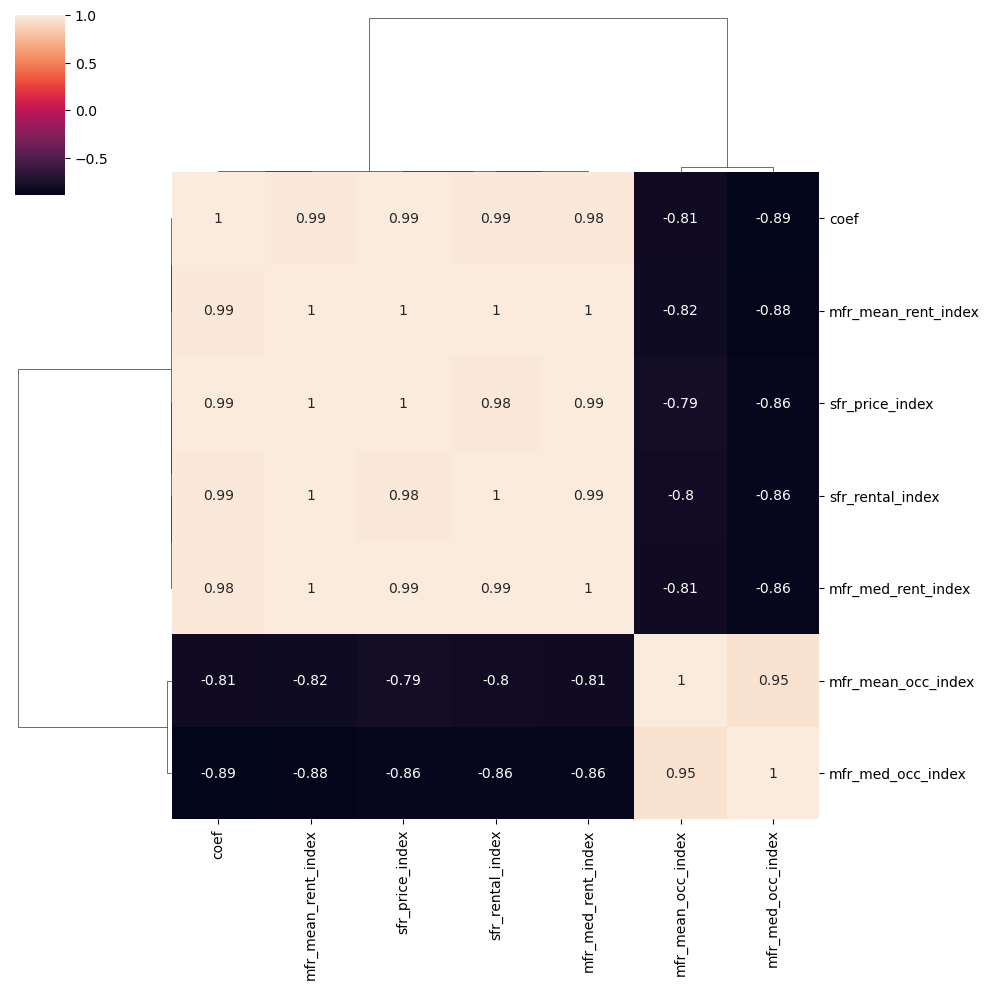

In [99]:
trend_dict = {
    ts: sm.tsa.seasonal_decompose(df_zip[ts].dropna()).trend for ts in df_zip.columns
}

# Compute corr matrix
trend_dict = pd.DataFrame(trend_dict).corr()

sns.clustermap(trend_dict, annot=True, square=True)
plt.show();

### Residual Noise

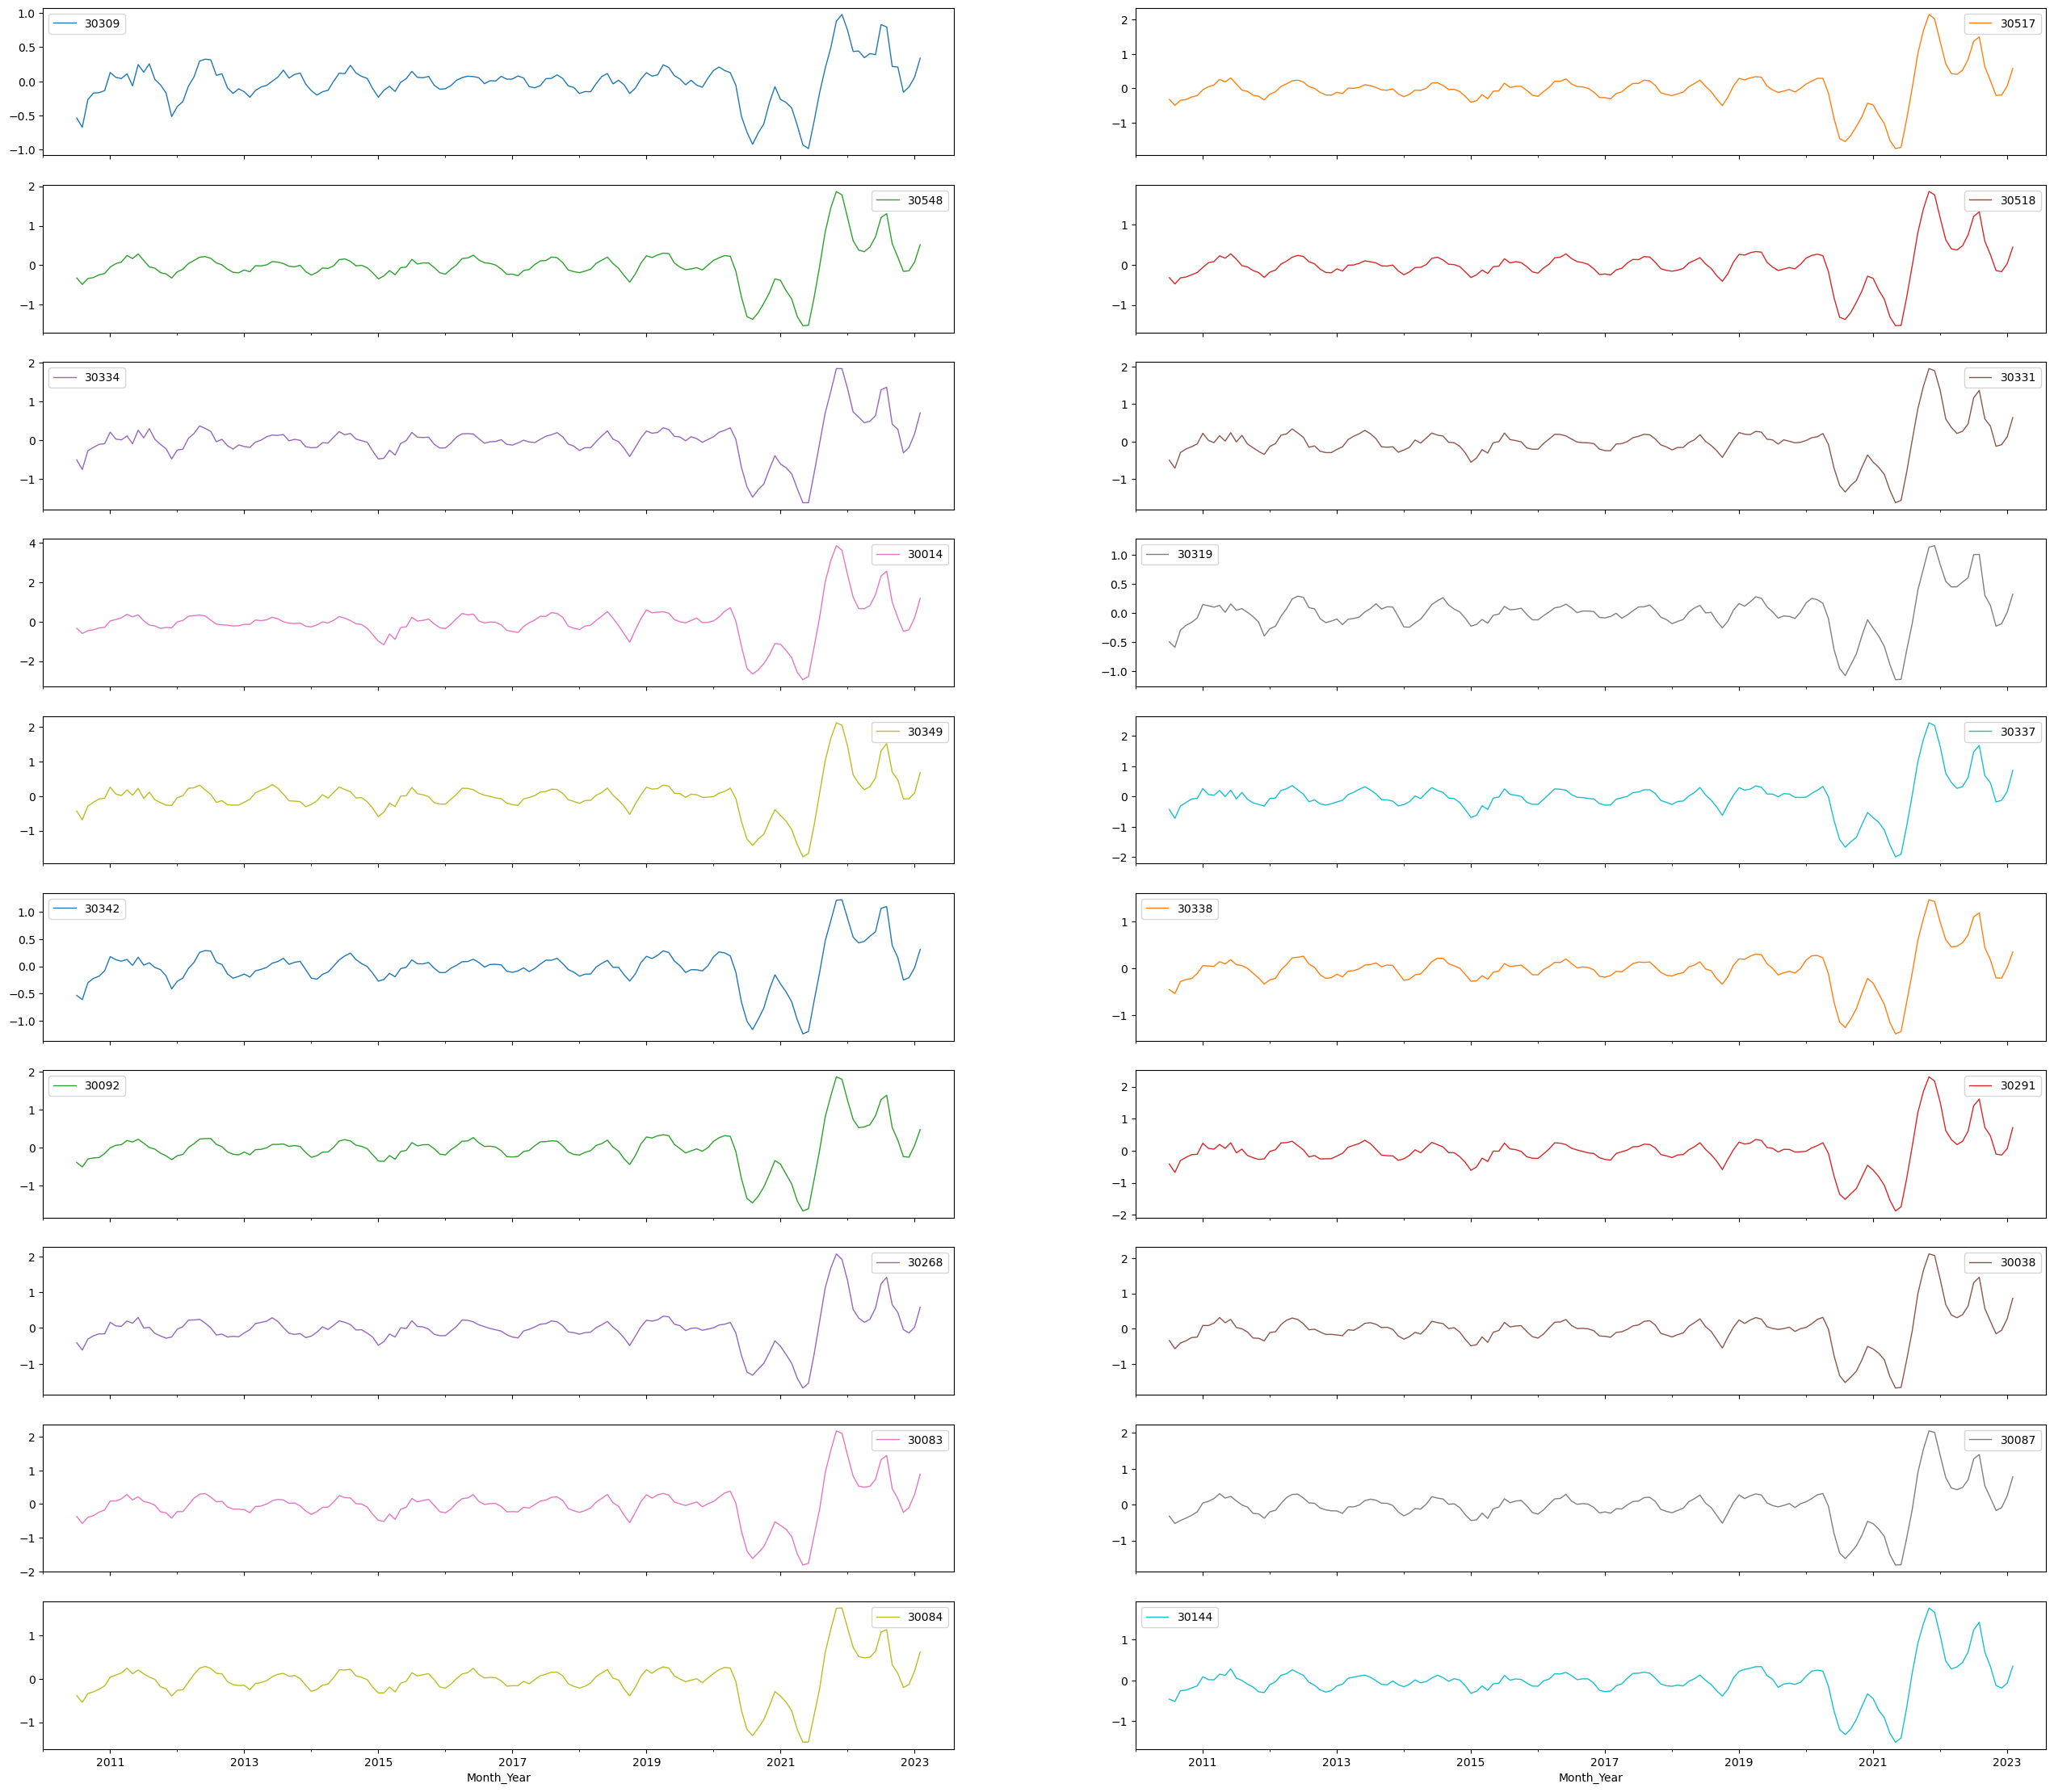

In [98]:
resid_noise = {}


for ts in unique_zc_subset:
    tmp = df[df['zipcode']==ts]
    decompositions = sm.tsa.seasonal_decompose(tmp['sfr_rental_index'])
    # Store the results back
    resid_noise[ts] = decompositions.resid
    
pd.DataFrame(resid_noise).plot(subplots=True, layout=(10, 2), linewidth=1);


### Autocorrelation
Autocorrelation is a valuable analytical technique for modeling time series data. In essence, it entails calculating the correlation coefficient, but with a unique twist. Instead of measuring the correlation between two distinct features, autocorrelation assesses the relationship of a time series with a delayed or lagged version of itself.

In [ ]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(tps["deg_C"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()